## **LGBM & XGBM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Statistics Summery
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check the null values:**

In [7]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Drop Unnecessary Columns:**

In [8]:
# Drop the Cabin feature due to a high number of missing values
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])


**Impute Missing Values:**

In [9]:
# Impute missing values in the Age column with the mean value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

# Impute missing values in the Embarked column with the most frequent value (mode)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Impute missing values in the Fare column in the test dataset with the mean value
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())


In [10]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print(test_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## **Visualization:**

**Histogram:**

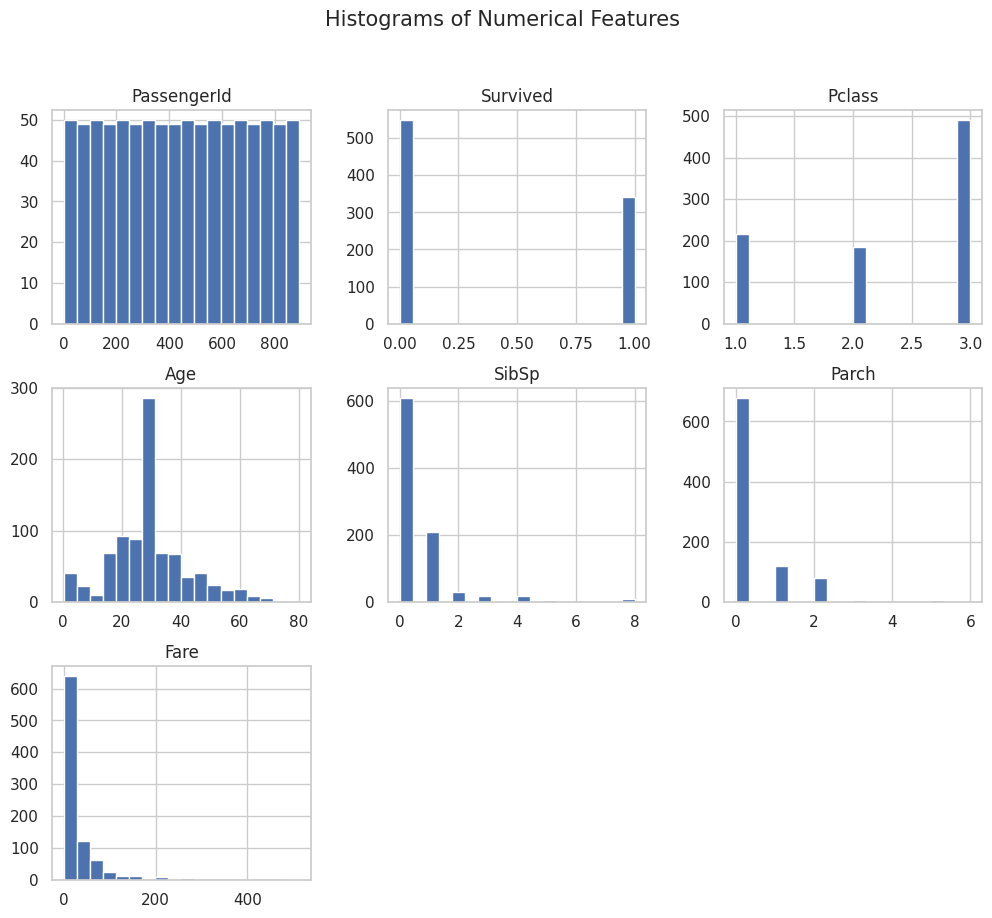

In [11]:
# Set the style for the plots
sns.set(style="whitegrid")

#histograms for numerical features
train_df.hist(figsize=(12, 10), bins=18)
plt.suptitle("Histograms of Numerical Features", size=15)
plt.show()


**Box Plot:**

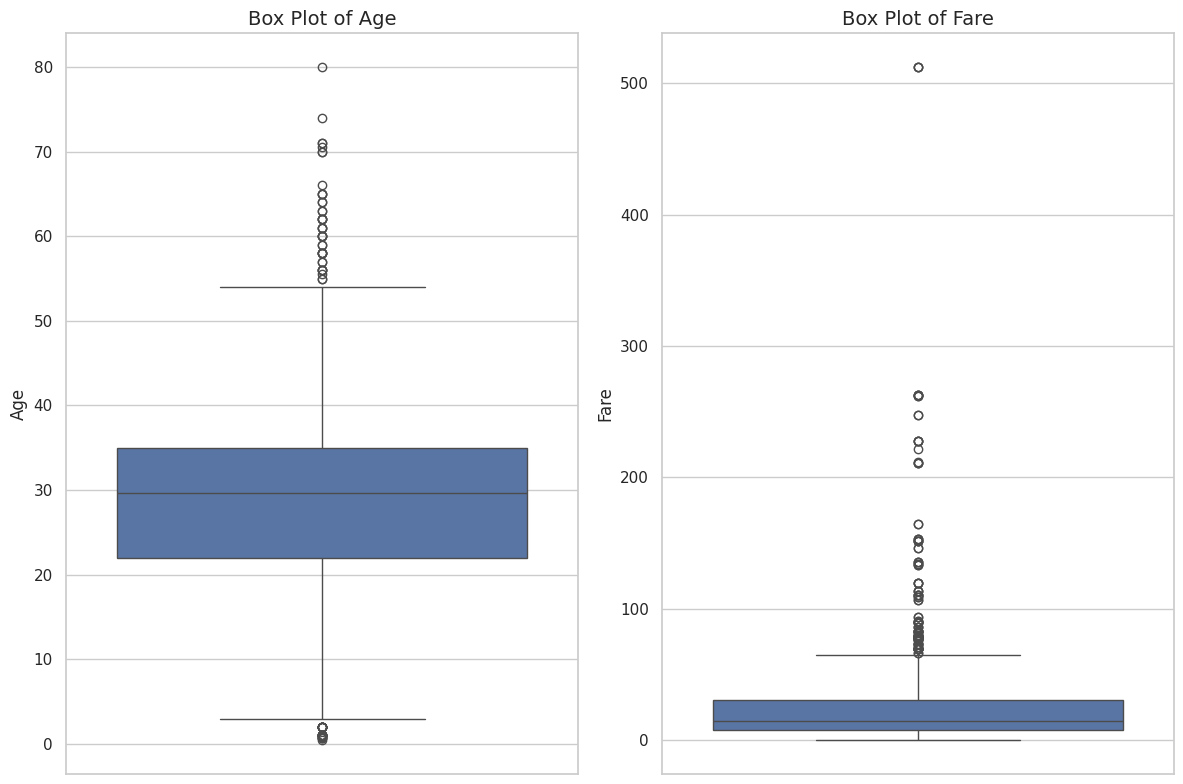

In [12]:
#box plots for numerical features to check for outliers
plt.figure(figsize=(12, 8))

for i, feature in enumerate(['Age', 'Fare'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=train_df, y=feature)
    plt.title(f"Box Plot of {feature}", size=14)

plt.tight_layout()
plt.show()

**Bar Plots:**

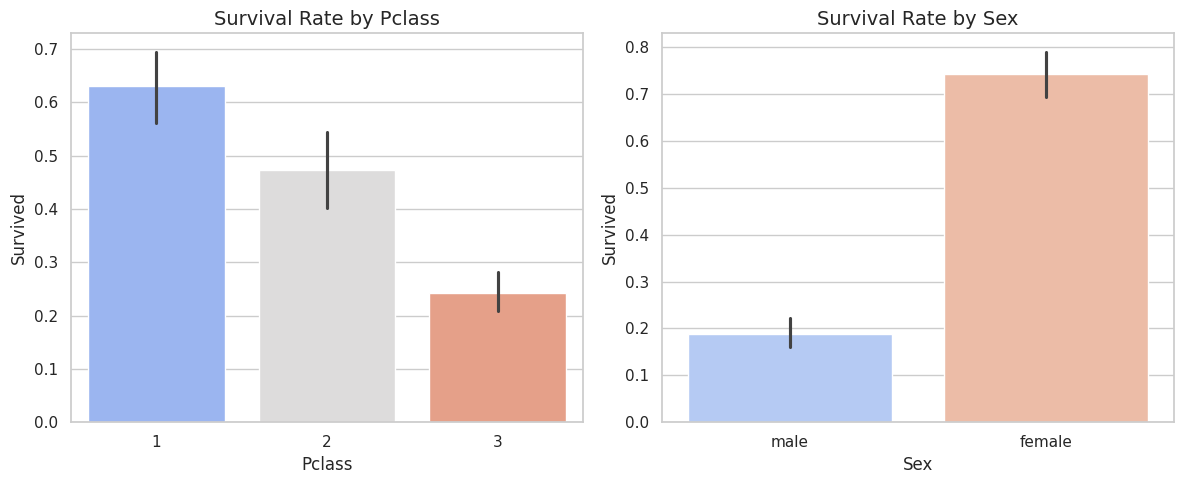

In [13]:
# Bar plots for categorical features: Pclass and Sex
plt.figure(figsize=(12, 5))

# Bar plot for Pclass
plt.subplot(1, 2, 1)
sns.barplot(data=train_df, x='Pclass', y='Survived', palette='coolwarm')
plt.title("Survival Rate by Pclass", size=14)

# Bar plot for Sex
plt.subplot(1, 2, 2)
sns.barplot(data=train_df, x='Sex', y='Survived', palette='coolwarm')
plt.title("Survival Rate by Sex", size=14)

plt.tight_layout()
plt.show()


**Scatter Plot:**

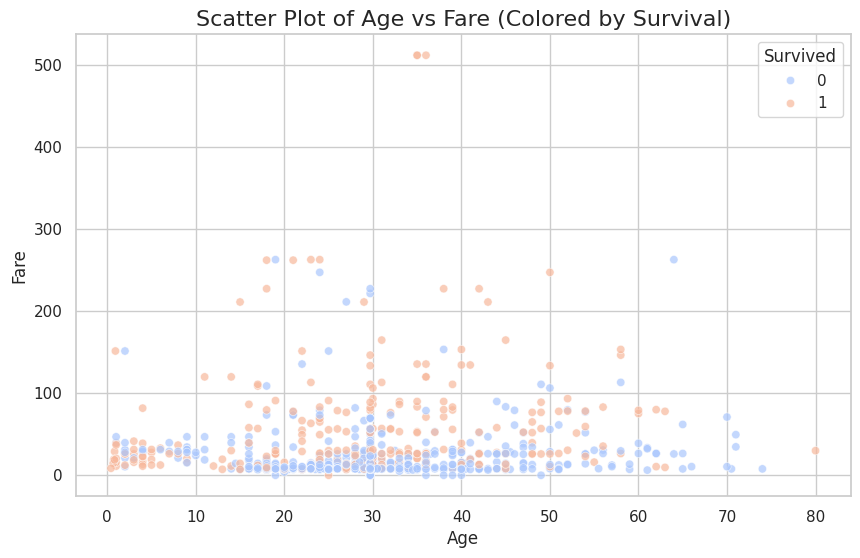

In [14]:
# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot of Age vs Fare (Colored by Survival)", size=16)
plt.show()

**Encode Categorical Variables:**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (Sex and Embarked) using Label Encoding
label_encoders = {}

for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le


## **Building Predictive Models:**

In [16]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y) in the training set
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)


**Train LightGBM and XGBoost Models:**

In [17]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
lgb_model = lgb.LGBMClassifier(random_state=2)
xgb_model = xgb.XGBClassifier(random_state=2)

# Train LightGBM model
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)

# Train XGBoost model
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## **Model Evaluation:**

In [18]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Evaluate LightGBM
lgb_metrics = evaluate_model(y_val, lgb_preds)
print(f"LightGBM - Accuracy: {lgb_metrics[0]}, Precision: {lgb_metrics[1]}, Recall: {lgb_metrics[2]}, F1-Score: {lgb_metrics[3]}")

# Evaluate XGBoost
xgb_metrics = evaluate_model(y_val, xgb_preds)
print(f"XGBoost - Accuracy: {xgb_metrics[0]}, Precision: {xgb_metrics[1]}, Recall: {xgb_metrics[2]}, F1-Score: {xgb_metrics[3]}")


LightGBM - Accuracy: 0.8379888268156425, Precision: 0.8333333333333334, Recall: 0.7246376811594203, F1-Score: 0.7751937984496124
XGBoost - Accuracy: 0.8156424581005587, Precision: 0.7727272727272727, Recall: 0.7391304347826086, F1-Score: 0.7555555555555555


## **Comparative Analysis:**

      Metric  LightGBM   XGBoost
0   Accuracy  0.837989  0.815642
1  Precision  0.833333  0.772727
2     Recall  0.724638  0.739130
3   F1-Score  0.775194  0.755556


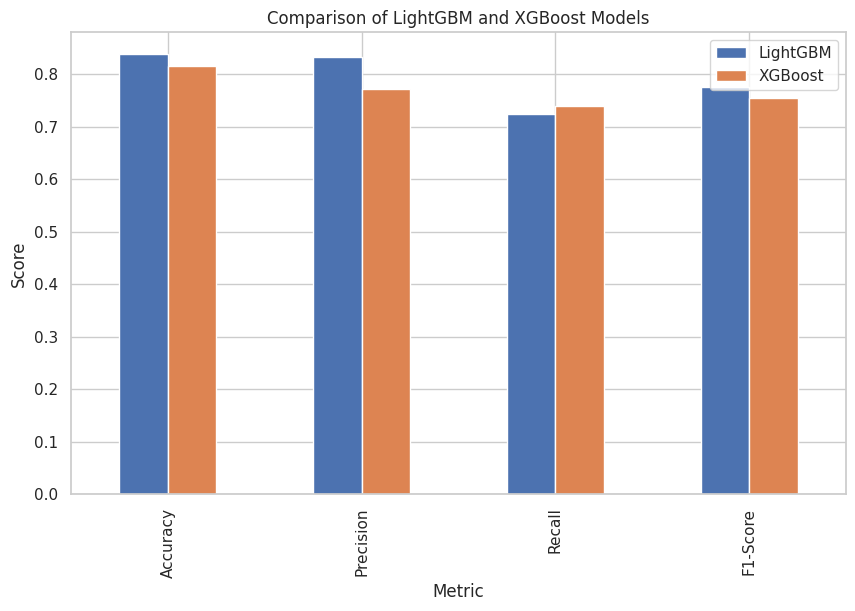

In [19]:
# Compare the performance metrics of the two models
import numpy as np

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': lgb_metrics,
    'XGBoost': xgb_metrics
})

print(metrics_df)

# Visualize the comparison
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LightGBM and XGBoost Models')
plt.ylabel('Score')
plt.show()


If your priority is speed and you are working with a large dataset, LightGBM might be the better option.   
If you need robustness and extensive control over the model's behavior, especially when handling overfitting, XGBoost might be more suitable.